In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.data.datasets import register_coco_instances

In [2]:
dataset = 'coco2017'
annot_dir = './coco2017/annotations'
imgs_dir = './coco2017/{}2017'

for split in ['train', 'val']:
    #if split == 'train':
        #annot_path = 'cityscapes/annotations/instancesonly_filtered_gtFine_train_temp.json'
    #else:
    annot_path = os.path.join(annot_dir, f'instances_{split}2017.json')
    d_name = dataset + f'_{split}'
    register_coco_instances(d_name, {}, annot_path, imgs_dir.format(split))

# Load dataset
dataset_dicts = DatasetCatalog.get('coco2017_val')
metadata = MetadataCatalog.get('coco2017_val')

[05/05 16:23:25 d2.data.datasets.coco]: Loaded 5000 images in COCO format from ./coco2017/annotations/instances_val2017.json


In [4]:
from detectron2.model_zoo import get_config
from detectron2.config import LazyConfig
from detectron2.config.instantiate import instantiate
from detectron2.engine import DefaultPredictor

cfg = LazyConfig.load("khang_net/configs/huflit_net/huflitnet_v_57_ese_1x.py")

In [5]:
from khang_net.engine.default_predictor import DefaultPredictor

cfg.train.device = 'cpu'
predictor = DefaultPredictor(cfg)
#predictor.model.yolof.score_threshold = 0.5

[05/05 16:24:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from  ...


/Users/giakhang/miniconda3/envs/hope_to_public_net/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1708025539291/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


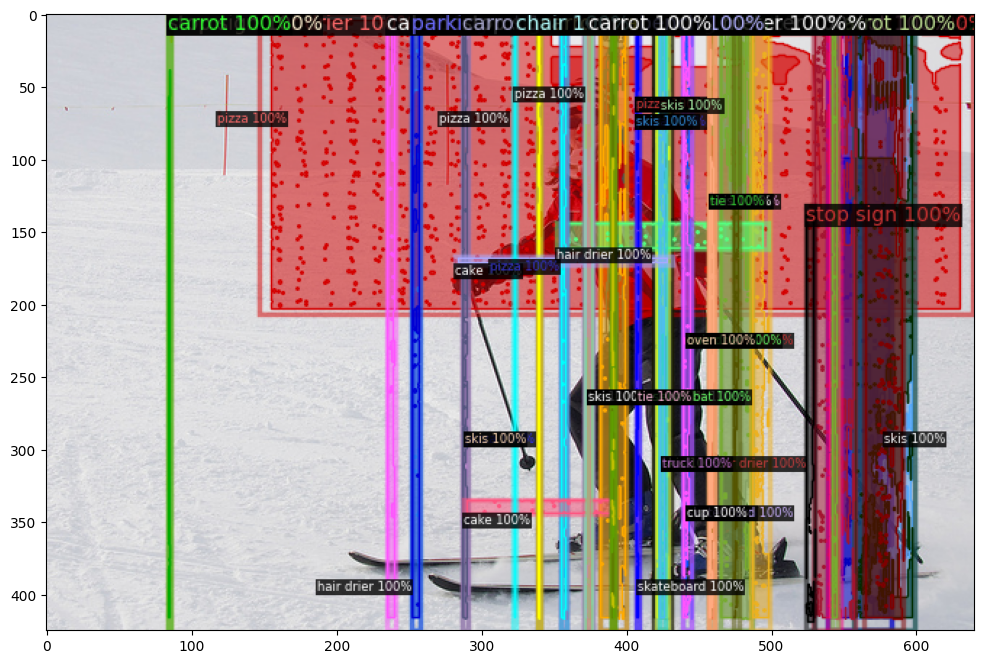

In [6]:
from detectron2.utils.visualizer import ColorMode

im = cv2.imread("./coco2017/val2017/000000000785.jpg")
predictions = predictor(im)
plt.figure(figsize=(12, 8))
v = Visualizer(im[:, :, ::-1],
               #scale=0.5, 
               metadata=MetadataCatalog.get("coco2017_val")
               #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(predictions["instances"].to("cpu"))
#axs[0].imshow(im[:, :, ::-1])
plt.imshow(out.get_image())

In [1]:
!python3 train_huflitnet_v_39_ese_1x.py

[05/07 21:58:09 d2.data.datasets.coco]: Loading ./coco2017/annotations/instances_train2017.json takes 13.82 seconds.
[05/07 21:58:14 d2.data.datasets.coco]: Loaded 118287 images in COCO format from ./coco2017/annotations/instances_train2017.json
[05/07 21:58:48 detectron2]: Rank of current process: 0. World size: 1
[05/07 21:58:48 detectron2]: Rank of current process: 0. World size: 1
[05/07 21:58:48 detectron2]: Environment info:
-------------------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------